Model the window correction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import fitsio as ft
from glob import glob

In [2]:
randoms = ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits', lower=True)
randoms.dtype.names

('ra',
 'dec',
 'z',
 'weight_fkp',
 'weight_systot',
 'weight_cp',
 'weight_noz',
 'nz')

In [3]:
randoms = np.random.choice(randoms, size=10000, replace=False)

In [4]:
import nbodykit.lab as nb

In [5]:
randoms = nb.ArrayCatalog(randoms)

In [6]:
randoms.columns

['Selection',
 'Value',
 'Weight',
 'dec',
 'nz',
 'ra',
 'weight_cp',
 'weight_fkp',
 'weight_noz',
 'weight_systot',
 'z']

In [7]:
randoms['Weight'] = randoms['weight_cp']*randoms['weight_noz']*randoms['weight_systot']*randoms['weight_fkp']

In [87]:
edges = np.logspace(np.log10(0.1), np.log10(5000.0), 100)
# edges = np.linspace(0.001, 5000.0, 100)
cosmo = nb.cosmology.Planck15
RR    = nb.SurveyDataPairCount('2d', randoms, edges, Nmu=20, cosmo=cosmo, 
                               ra='ra', dec='dec', redshift='z', weight='Weight',
                               show_progress=1)

Text(0.5,0,'r')

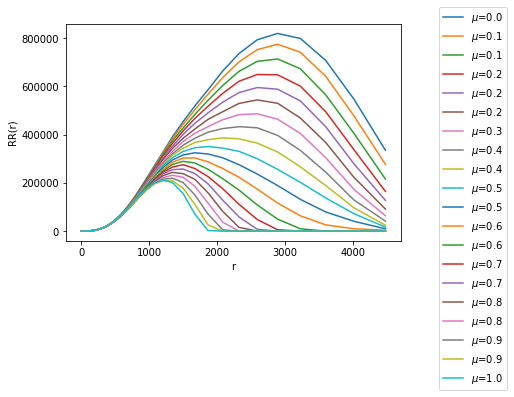

In [89]:
for j, mu_j in enumerate(RR.pairs.edges['mu'][:-1]):
    #print(j)
    plt.plot(RR.pairs.edges['r'][:-1], RR.pairs['wnpairs'][:, j], label=r'$\mu$=%.1f'%mu_j)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('RR(r)')
plt.xlabel('r')

In [38]:
from scipy.special import legendre

In [53]:
def RR_to_ell(RR, mu_bins, ell):
    mu_mid = 0.5*(mu_bins[:-1]+mu_bins[1:])
    legendre_pol = (2*ell+1.)*legendre(ell)(mu_mid)
    mu_diff = np.diff(mu_bins) 
    RR_ell = np.sum(RR * legendre_pol * mu_diff, axis=1) / np.sum(mu_bins)
    return RR_ell    

0.0
0.0
0.0


(1, 8099.5561321187715)

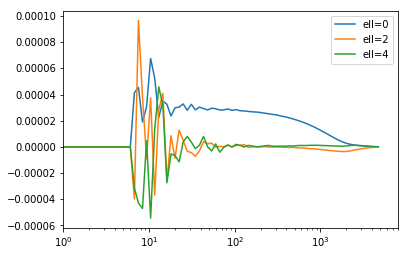

In [91]:
for ell in [0, 2, 4]:
    x   = RR.pairs.edges['r']
    y   = RR_to_ell(RR.pairs['wnpairs'], RR.pairs.edges['mu'], ell)
    dx  = np.diff(x)
    xc  = 0.5*(x[1:]+x[:-1])
    vol = 4*np.pi*xc**2*dx    
    y  /= vol
    print(y[0])
    plt.plot(xc, y, label='ell=%d'%ell)
plt.legend()
plt.xscale('log')
plt.xlim(xmin=1)

Use SurveyDataPairCount and use Nmu= 100
Inside this SurveyDataPairCount, modify the option for 1d.
And made mode 2d

Make your code so that it addes all different mu bins aftermultiply with Legendre_ell(mu)


In [77]:
edges = np.logspace(np.log10(0.1), np.log10(5000.0), 100)
# edges = np.linspace(0.001, 5000.0, 100)
cosmo = nb.cosmology.Planck15
RR1d    = nb.SurveyDataPairCount('1d', randoms, edges, cosmo=cosmo, 
                               ra='ra', dec='dec', redshift='z', weight='Weight',
                               show_progress=True)

(1, 7657.393122730506)

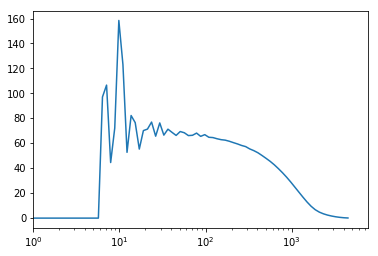

In [86]:
dr = np.diff(edges)
plt.plot(edges[:-1], RR1d.pairs['wnpairs']/ ((4*np.pi*edges[:-1]**2*dr)))
plt.xscale('log')
plt.xlim(xmin=1)